In [2]:
from Helper.Linear_Algebra import dot
Vector  = list[float]

Sum of Squares


In [3]:
def sum_of_squares(v: Vector) -> float:
    """ Computes the Sum of Squared elements in v """
    return dot(v,v)


Difference Quotients

In [4]:
from typing import Callable

def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

For Square and its derivative

In [5]:
def square( x: float) -> float:
    return x ** x

def derivative(x: float) -> float:
    return 2 * x

/home/codespace/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


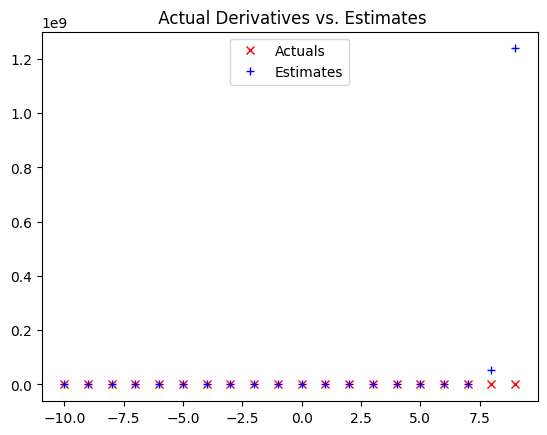

In [6]:
xs = range(-10,10)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.00001) for x in xs]


# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title(" Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actuals')  # "rx" = red 'x'
plt.plot(xs, estimates, 'b+', label='Estimates') # "b+" = blue '+'
plt.legend(loc= 9)
plt.show()

In [7]:
[[x,y] for x , y in zip(actuals, estimates)]

[[-20, (3.302589779136714e-10+3.1416964086510877e-10j)],
 [-18, (-8.252598596603976e-09-8.109259029228326e-09j)],
 [-16, (1.8354886664620526e-07+1.872592805705995e-07j)],
 [-14, (-3.5771094860970983e-06-3.814840515897403e-06j)],
 [-12, (5.9836853916574773e-05+6.733711334109959e-05j)],
 [-10, (-0.0008350149149167692-0.0010053358822054077j)],
 [-8, (0.009321375914542185+0.012272139146925468j)],
 [-6, (-0.07772530718347381-0.11635772531800219j)],
 [-4, (0.4232774163726027+0.785411461311021j)],
 [-2, (-0.9999506514146715-3.141624068999167j)],
 [0, -11.512262753143874],
 [2, 1.0000100000517875],
 [4, 6.7726560577519015],
 [6, 56.66317136281406],
 [8, 610.8989653228036],
 [10, 8154.602995273307],
 [12, 130254.18685501789],
 [14, 2426120.0055247173],
 [16, 51665261.88477873],
 [18, 1238690326.1363506]]

Partial Difference Quotient

In [8]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """ Returns the i-th partial difference quotient of f at v """
    w = [v_j + (h if j == i else 0) # add h to just the ith element of v
         for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) /h

In [9]:
def estimate_gradient( f: Callable[[Vector], float],
                      v: Vector, 
                      h: float = 0.0001):
    
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

Gradients from scratch

In [10]:
from Helper.Linear_Algebra import distance, add, scalar_multiply
import random

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """  Moves 'step_size in the 'gradient' direction from v"""

    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10,10) for i in range(3)]
print(v)
for epoch in range(1000):
    grad = sum_of_squares_gradient(v)  # Compute the gradient at v
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)

assert distance(v, [0,0,0]) < 0.001 # v should be close to 0

[-0.204132964464387, -6.988133921634738, 1.4278667197415]
0 [-0.20005030517509925, -6.848371243202043, 1.39930938534667]
1 [-0.19604929907159727, -6.711403818338002, 1.3713231976397366]
2 [-0.19212831309016531, -6.577175741971241, 1.3438967336869418]
3 [-0.18828574682836202, -6.445632227131816, 1.317018799013203]
4 [-0.18452003189179478, -6.3167195825891795, 1.290678423032939]
5 [-0.18082963125395887, -6.190385190937396, 1.26486485457228]
6 [-0.1772130386288797, -6.066577487118648, 1.2395675574808345]
7 [-0.17366877785630208, -5.945245937376275, 1.2147762063312177]
8 [-0.17019540229917604, -5.826341018628749, 1.1904806822045935]
9 [-0.1667914942531925, -5.709814198256175, 1.1666710685605015]
10 [-0.16345566436812867, -5.595617914291052, 1.1433376471892915]
11 [-0.1601865510807661, -5.483705556005231, 1.1204708942455057]
12 [-0.15698282005915076, -5.3740314448851265, 1.0980614763605956]
13 [-0.15384316365796774, -5.266550815987424, 1.0761002468333838]
14 [-0.1507663003848084, -5.1612197

Using Gradient Descent to fit models 


In [11]:
# x ranger from -50 to 49 , y is always 20 * x + 5

inputs =  [(x, 20*x+5) for x in range(-50,50)]

In [12]:
def linear_gradient(x: float, y:float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept # The prediction of the model.
    error = (predicted - y)  # error is (predicted - actual)
    squared_error = error ** 2 # We will minimize the squared error
    grad = [ 2 * error * x, 2 * error] # using its gradient 
    return grad

In [13]:
from Helper.Linear_Algebra import vector_mean

# Start with random values for slope and intercept
theta = [random.uniform(-1,1),random.uniform(-1,1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x,y,theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch,theta)

slope, intercept = theta
assert 19.9 < slope <20.1
assert 4.9 < intercept <5.1

0 [33.595373207744736, -0.9343492946384829]
1 [10.925951721139626, -0.9088852228414612]
2 [26.046481316777026, -0.9061415006746387]
3 [15.961090820209046, -0.8882827363565124]
4 [22.68806414018421, -0.8805450800635903]
5 [18.201180673417067, -0.8660959257632789]
6 [21.19394639490505, -0.8561625532383353]
7 [19.197781592045093, -0.8432562817369536]
8 [20.529236421824187, -0.8323719875814346]
9 [19.641166934655686, -0.8201780071844476]
10 [20.233521476577472, -0.8088964842354229]
11 [19.838432278638592, -0.7970451697903745]
12 [20.10196862497827, -0.7856126471721552]
13 [19.92620131449232, -0.7739394532528326]
14 [20.043449783780368, -0.7624653730318346]
15 [19.96525652884546, -0.7508969925019905]
16 [20.017422998267573, -0.739429941988141]
17 [19.982639430213542, -0.7279336591058971]
18 [20.00585156638846, -0.7164951523574717]
19 [19.99038051006654, -0.7050563104863684]
20 [20.000711143475133, -0.6936558173553291]
21 [19.99383201148473, -0.6822677945771434]
22 [19.998431780545108, -0.67

 [19.99996082049557, 4.934766101594214]
2254 [19.99996089883105, 4.934896530211521]
2255 [19.999960977009902, 4.935026698049929]
2256 [19.999961055032447, 4.935156605630839]
2257 [19.99996113289899, 4.93528625347461]
2258 [19.99996121060985, 4.935415642100559]
2259 [19.99996128816533, 4.935544772026968]
2260 [19.999961365565753, 4.9356736437710795]
2261 [19.999961442811415, 4.935802257849103]
2262 [19.999961519902634, 4.935930614776216]
2263 [19.999961596839718, 4.936058715066566]
2264 [19.999961673622973, 4.936186559233272]
2265 [19.99996175025271, 4.936314147788429]
2266 [19.99996182672923, 4.936441481243105]
2267 [19.999961903052846, 4.936568560107348]
2268 [19.99996197922386, 4.936695384890187]
2269 [19.999962055242577, 4.93682195609963]
2270 [19.9999621311093, 4.936948274242673]
2271 [19.99996220682434, 4.937074339825297]
2272 [19.99996228238799, 4.937200153352471]
2273 [19.999962357800563, 4.9373257153281545]
2274 [19.999962433062354, 4.937451026255299]
2275 [19.999962508173667, 

Minibatch Gradient Descent

In [14]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # This allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """  Generates 'batch_size' -sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, .....
    batch_starts = [ start for start in range(0, len(dataset),batch_size)]

    if shuffle: random.shuffle(batch_starts) # Shuffle the batches
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [17]:
theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x,y,theta) for x,y in batch ])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1 

0 [18.537825554625645, 8.470914068913341]
1 [19.885311848569785, 8.262864690626945]
2 [19.982237039047554, 8.244186990826877]
3 [19.998075495963583, 8.102673520079748]
4 [19.852686302820846, 8.09114155047932]
5 [19.869416984054958, 8.085694840780679]
6 [19.974720829742143, 8.06870457314987]
7 [19.994414322341566, 7.928575008916965]
8 [20.01158538917422, 7.919127681974803]
9 [20.098341757806093, 7.889587892163558]
10 [19.427833032357366, 7.855292122345044]
11 [19.50782408623646, 7.716367159527295]
12 [19.88745465876544, 7.723105397282087]
13 [20.0994665774882, 7.698354065907552]
14 [19.911935714077394, 7.669964881917771]
15 [19.944687695267895, 7.653267004349551]
16 [19.882814866197265, 7.640764952906612]
17 [20.09366931652409, 7.525549839616707]
18 [19.604337475077397, 7.497342585451362]
19 [19.963265514155673, 7.486628121937161]
20 [20.365694091061876, 7.4503312504607075]
21 [20.141269228946125, 7.42394851300828]
22 [20.247900259173228, 7.405259526471584]
23 [21.04527302215331, 7.3324

Stochastic Gradient Descent

In [18]:
theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x,y, theta)
        theta = gradient_step(theta,grad, -learning_rate)
    print(epoch, theta)


slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1

0 [20.117203780995766, -0.8334826971168096]
1 [20.112174647169816, -0.583204325833928]
2 [20.107361942132286, -0.34366385100933067]
3 [20.102755720617008, -0.11440056357813785]
4 [20.098347110687598, 0.10502646624864183]
5 [20.0941276360295, 0.3150392504580189]
6 [20.090089201141197, 0.5160416955926875]
7 [20.08622403612815, 0.708420379398412]
8 [20.08252469758137, 0.8925452937224345]
9 [20.078984070990867, 1.0687705562038745]
10 [20.075595370610028, 1.2374350919601822]
11 [20.072352053425174, 1.398863284899559]
12 [20.06924788229752, 1.5533656011620975]
13 [20.066276863637263, 1.7012391862608536]
14 [20.06343335925356, 1.8427684381245795]
15 [20.060711813678267, 1.9782255526315724]
16 [20.058107046286725, 2.1078710468693496]
17 [20.055614044805417, 2.231954261716086]
18 [20.05322798129336, 2.350713839677753]
19 [20.05094431301893, 2.4643781848980635]
20 [20.0487586143893, 2.5731659023063322]
21 [20.046666683332056, 2.677286217297624]
22 [20.04466450318337, 2.7769393788339674]
23 [20.0